## Library Setting

In [0]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno


## Data Load

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/Python/Train/Bike/train.csv',parse_dates=['datetime'])
test  = pd.read_csv('/content/drive/My Drive/Python/Train/Bike/test.csv')

## EDA

In [0]:
## dim 
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [0]:
## info
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 no

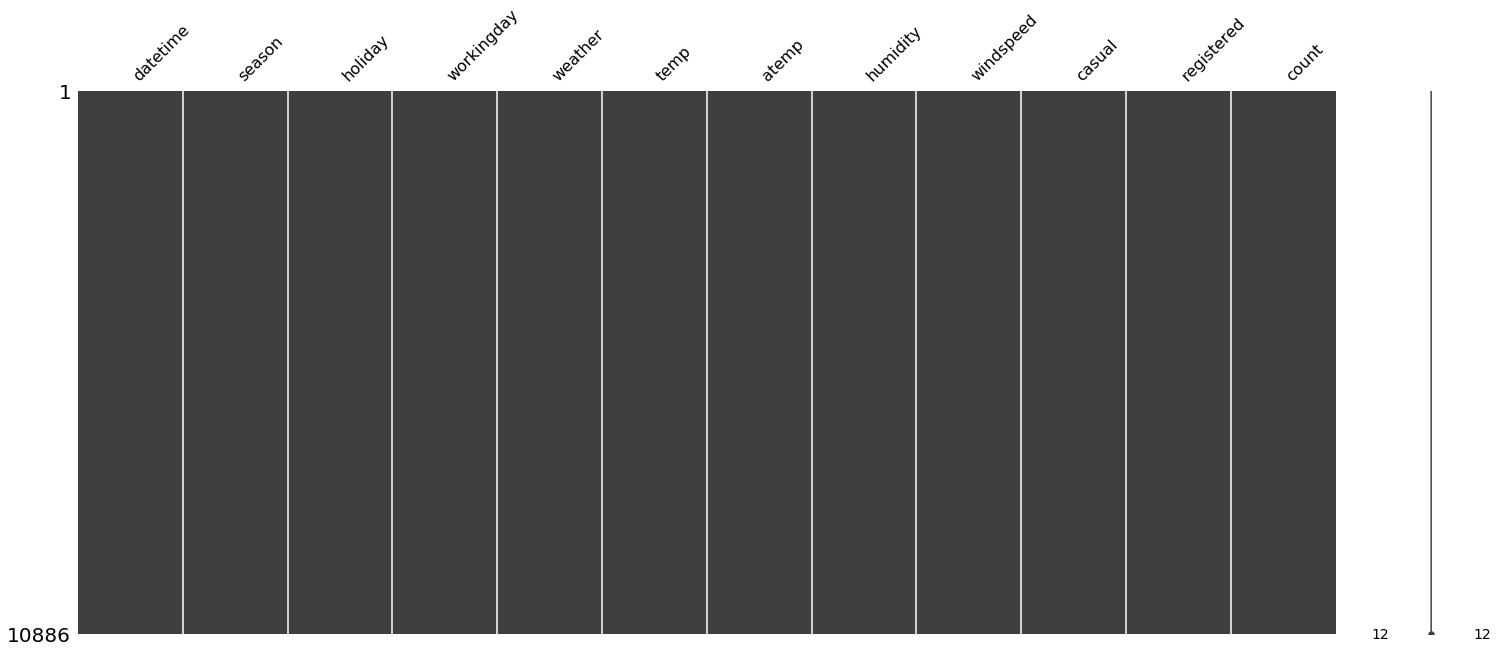

In [0]:
msno.matrix(train)

In [0]:
## column
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


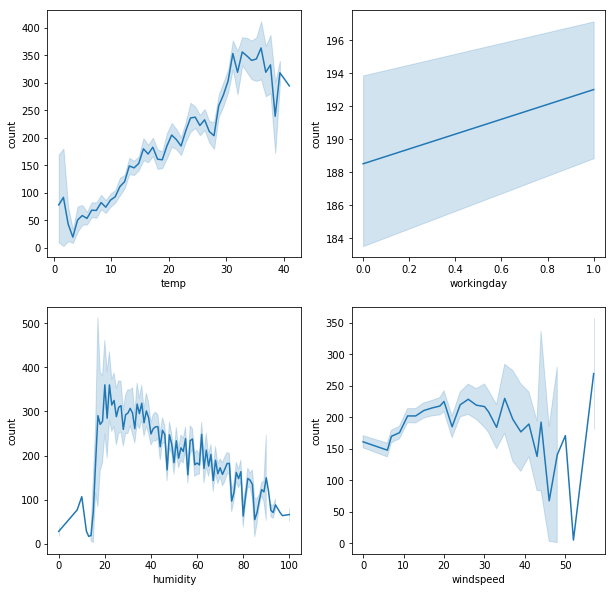

In [0]:
fig = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.lineplot(x='temp',y='count',data = train)
plt.subplot(2,2,2)
sns.lineplot(x='workingday',y='count',data = train)
plt.subplot(2,2,3)
sns.lineplot(x='humidity', y='count',data=train)
plt.subplot(2,2,4)
sns.lineplot(x='windspeed',y='count',data = train)


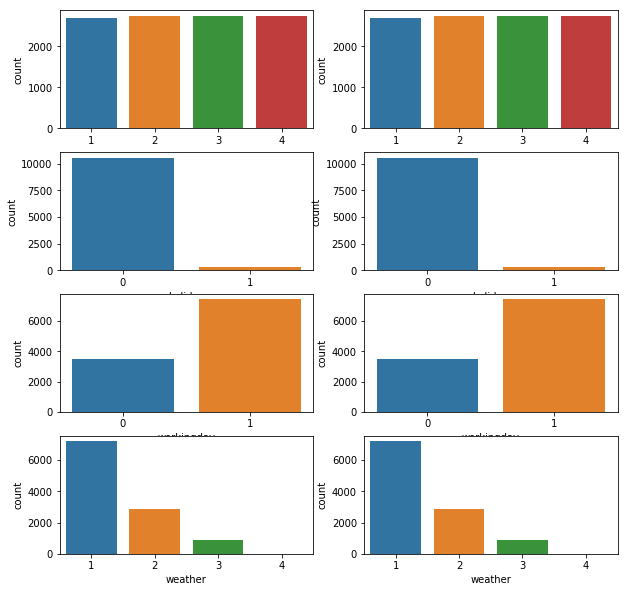

In [0]:
col = ['season','holiday','workingday','weather']
fig = plt.figure(figsize = (10,10))
for i in range(len(col)):
    for j in (1,2):
        plt.subplot(4,2,2*i+j)
        sns.countplot(col[i],data=train)
        plt.subplot(4,2,2*i+j)
        sns.countplot(col[i],data=test)

    

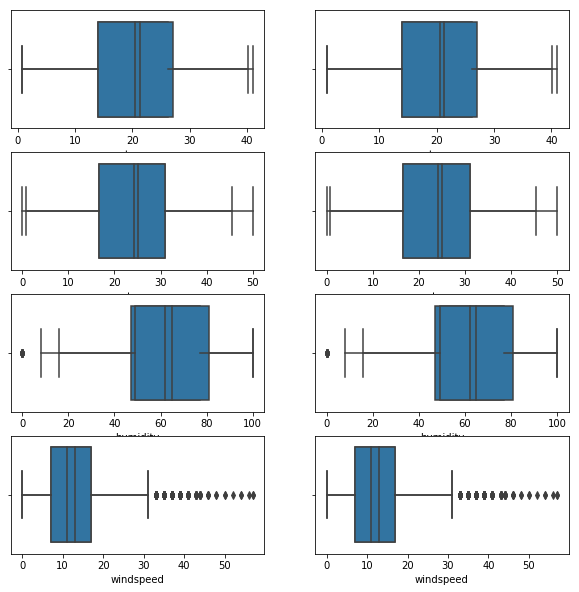

In [0]:
col_num = ['temp','atemp','humidity','windspeed']

fig = plt.figure(figsize = (10,10))

for i in range(len(col_num)):
    for j in (1,2):
        plt.subplot(4,2,2*i+j)
        sns.boxplot(col_num[i],data=train)
        plt.subplot(4,2,2*i+j)
        sns.boxplot(col_num[i],data=test)

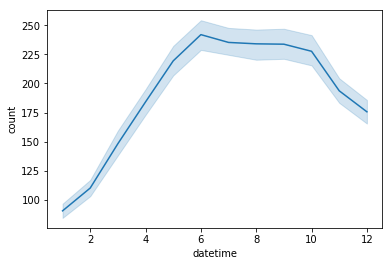

In [0]:
sns.lineplot(x=train.datetime.dt.month,y='count',data=train)

In [0]:
test.datetime = pd.to_datetime(test.datetime)

In [0]:
train_new = train.copy()
test_new  = test.copy()

In [0]:
train_new['year']      = train_new.datetime.dt.year
train_new['month']     = train_new.datetime.dt.month
train_new['day']       = train_new.datetime.dt.day
train_new['hour']      = train_new.datetime.dt.hour
train_new['minute']    = train_new.datetime.dt.minute
train_new['second']    = train_new.datetime.dt.second
train_new['dayofweek'] = train_new.datetime.dt.dayofweek

test_new['year']      = test_new.datetime.dt.year
test_new['month']     = test_new.datetime.dt.month
test_new['day']       = test_new.datetime.dt.day
test_new['hour']      = test_new.datetime.dt.hour
test_new['minute']    = test_new.datetime.dt.minute
test_new['second']    = test_new.datetime.dt.second
test_new['dayofweek'] = test_new.datetime.dt.dayofweek

train_new = train_new.drop(['minute','second'],axis = 1)
test_new  = test_new.drop(['minute','second'],axis = 1)

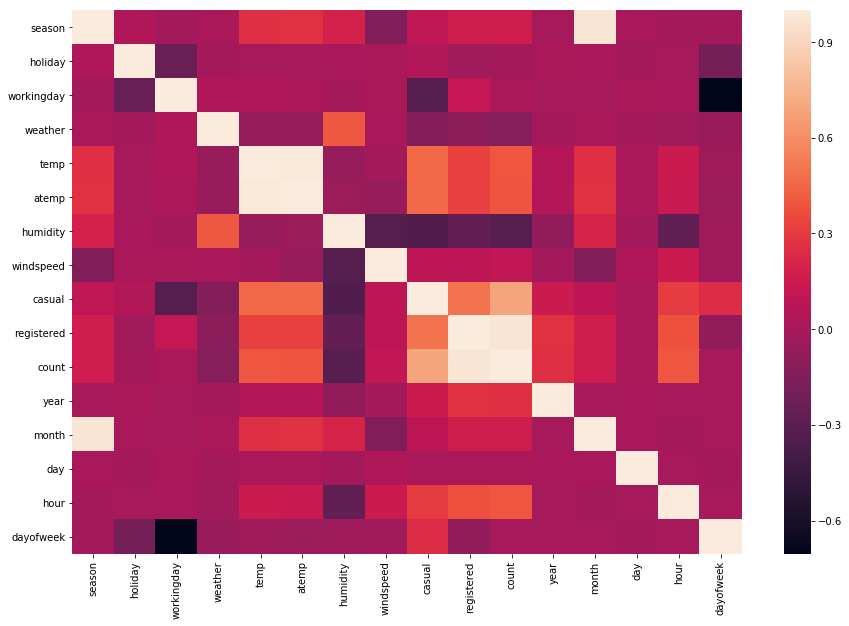

In [0]:
plt.figure(figsize = (15,10))
g = sns.heatmap(train_new.corr())

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [0]:
rf = RandomForestRegressor()
lr = LinearRegression()
kn = KNeighborsRegressor(n_neighbors=5)

In [0]:
sel = ['temp','atemp','hour','year']
goal = ['count']
X_train = train_new[sel] 
y_train = train_new[goal]
X_test  = test_new[sel]


In [0]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
pred_rf = rf.predict(X_test)

In [0]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
pred_lr = lr.predict(X_test)

In [0]:
pred_kn = kn.predict(X_test)



In [0]:
print(pred_rf.shape)
print(pred_lr.shape)
print(pred_kn.shape)

(6493,)
(6493, 1)
(6493, 1)


In [0]:
print(pred_lr[:10])
print(pred_rf[:10])
print(pred_kn[:10])

[[-36.47162953]
 [-22.77522293]
 [-13.49856516]
 [ -5.69191197]
 [  3.58474579]
 [  5.36655087]
 [  8.61836051]
 [ 17.89501828]
 [ 27.17167604]
 [ 42.47318192]]
[ 22.25        12.8377381    9.10333333  19.5          2.9
   9.43833333  43.85547619 125.69166667 210.45238095 114.86666667]
[[ 17.4]
 [ 25.4]
 [ 17. ]
 [ 11. ]
 [  2. ]
 [  7.6]
 [ 31.4]
 [129.2]
 [246.8]
 [125.4]]


In [0]:
df_pred = pd.DataFrame({'linear':np.reshape(pred_lr,(6493,)),'knn':np.reshape(pred_kn,(6493,)),'randomforest':pred_rf})

In [0]:
df_pred

,linear,knn,randomforest
0,-36.471630,17.4,22.250000
1,-22.775223,25.4,12.837738
2,-13.498565,17.0,9.103333
3,-5.691912,11.0,19.500000
4,3.584746,2.0,2.900000
5,5.366551,7.6,9.438333
6,8.618361,31.4,43.855476
7,17.895018,129.2,125.691667
8,27.171676,246.8,210.452381
9,42.473182,125.4,114.866667


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


In [0]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    diff = log_predict - log_actual
    square_diff = diff ** 2
    mean_square_diff = square_diff.mean()
    
    score = np.sqrt(mean_square_diff)
    
    return score

print(rmsle([10, 20, 30], [10, 20, 30]))
print(rmsle([10, 20, 30], [20, 30, 40]))
print(rmsle([10, 20, 30], [10, 40, 90]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.46474982164238354
0.7319565927299515


make_scorer(rmsle)

In [0]:
score = cross_val_score(lr,X_train,y_train,
                       cv=5,scoring=rmsle_score)
print(score)
print('RMLSE:',score.mean())

[       nan 1.22707557        nan 1.34450419 1.20805523]
RMLSE: nan


In [0]:
score = cross_val_score(rf,X_train,y_train,
                       cv=5,scoring=rmsle_score)
print(score)
print('RMSLE:',score.mean())

[1.90058107 1.75856101 1.88764248 1.90282957 1.86529372]
RMSLE: 1.8629815697449963


In [0]:
score = cross_val_score(kn,X_train,y_train,
                       cv=10,scoring=rmsle_score)
print(score)
print('RMSLE:',score.mean())

[1.09511814 0.80286237 0.61226331 0.68957278 0.77632867 0.86585457
 0.67654694 0.6272147  0.69652614 0.6941064 ]
RMSLE: 0.753639400672377


In [0]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

In [0]:
score = cross_val_score(xg_reg,X_train,y_train,
                       cv=20,scoring=rmsle_score)
print(score)
print('RMSLE:',score.mean())

[05:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re